まず、ニュートラルネットワークでは左の層を入力層、真ん中を中間層(隠れ層)、右の層を出力層という。<br><br>
# パーセプトロンの復習
y=0 b+w<sub>1</sub>x<sub>1</sub>+w<sub>2</sub>x<sub>2</sub>≦0  
y=1 b+w<sub>1</sub>x<sub>1</sub>+w<sub>2</sub>x<sub>2</sub>＞0  
なお、bはバイアスを示す。  を簡略化するには
y=h(b+w<sub>1</sub>x<sub>1</sub>+w<sub>2</sub>x<sub>2</sub>)として、  
h(x)=0(x≦0)  h(x)=0(x＞0) とすることができる。<br><br>
# 活性化関数  
h(x)のような入力信号の総和を出力信号に変換する関数は一般に活性化関数呼ばれる。名前が示す通り、活性化関数は入力信号の総和がどのように活性化するかを決定する役割がある。  
閾値を境にして出力が切り替わる関数を「ステップ関数」や「階段関数」と呼ぶ。
活性化関数にステップ関数以外の関数を用いることで、ニューラルネットワークの世界へ進むことができる。<br><br>
# シグモイド関数
ニューラルネットワークでよく用いられる活性化関数の一つはシグモイド関数だ。  
$$h(x)=\frac{1}{1+exp(-x)}$$　
なお、exp(x)はe<sup>-x</sup>を意味する。(eは2.7182…の実数を示す。)<br><br>
# ステップ関数の実装  
ここではpythonを用いてステップ関数をグラフtpする。  
ステップ関数を単純に実装するならばいかのようになる。  
>def step_function(x):
   if x > 0:
       return 1
   else:
       return 0 
       
しかし、以上のコードだとxが実数の場合のみしか入力ができないため、numpy配列を因数に引き取るような使い方ができない。そこで、numpy配列に対応した実装に修正する必要がある。

>def step_function(x)  
     y = x < 0
     return y.astype(np.int)
     
numpy配列に対して不等号の演算を行うと配列の各要素に対して不等号の演算を行い、ブーリアンの配列が生成される。<br><br>
# ステップ関数のグラフ
上で定義したステップ関数のグラフを表すにはライブラリのmatplotlibを使用する。
>import numpy as np  
import matplotlib.pylab as plt  
def step_function(x):  
    return np.array(x > 0, dtype=np.int  
    x = np,arange(-5.0, 5.0, 0.1)  
    y = step_function(x)  
    plot.plot(x,y)  
    plt.ylim(-0.1, 1.1)  
    plt show()  

In [25]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

    x = np.arange(-5.0, 5.0, 0.1)
    y = step_function(x)
    plot.plot(x, y)
    plt.ylim(-0.1, 1.1)
    plt.show()

# シグモイド関数の実装
シグモイド関数は以下のように記される。
>def sigmoid(x):  
     return 1 / (1 + np.exp(-x))
     
ここではxにnumpy配列を入寮しても結果が正しく計算される。

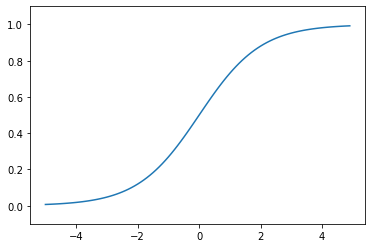

In [22]:
def sigmoid(x):  
     return 1 / (1 + np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# シグモイド関数とステップ関数の比較
シグモイド関数が滑らかで連続した関数である一方で、ステップ関数は０を境に急に出力を変える関数である。このシグモイド関数の滑らかさがニューラルネットワークの学習において重要な意味を持つ。  
しかし、両者は大きな視点で見ると同じような形をしており、両者とも入力が小さいほど出力は0に近く、入力が大きくなると１に近づくという構造をしている。よって両者は入力が重要ならば小さな値を出力し、その裏も成り立つといえる。  
# 非線形関数
また、両者の共通点はほかにも非線形であることがあげられる。シグモイド関数は曲線、ステップ関数は階段のように折れ曲がった直線であらわされるからだ。  
ニューラルネットワークでは活性化関数に非線形関数を用いる必要がある。つまり、活性化関数に線形関数を用いてはならない。なぜなら、s根警官数にするならばニューラルネットワークで層を厚くする必要がないからだ。線形関数の問題点はどんなに層を深くしてもそれと同じことを行う隠れ層のないネットワークが必ず存在するという事実に起因する。
# ReLU関数
古くから利用されているシグモイド関数よりも、近年では主にReLU関数という関数が使われる。ReLuでは入力が０を超えていればその入力をそのまま出力し、0以下ならば0を出力する関数だ。  
ReLU関数は以下のように記される。    
h(x)=x (x≧0)  
h(x)=0 (x<0)   
ReLu関数はシンプルな関数であるため実装も簡単である。  
>def relu(x):
     return np.maximum(0, x)
     
maximum関数は入力された値から大きいほうを選んで出力する関数だ。
# 多次元配列
行列の計算などに関しては既習であるため省略させていただく。  
配列の次元数は np.ndim()関数で、配列の形状はインスタンス変数の　shapeから取得できる。  
行列の積はnumpyの関数 np.dot()で計算できる。当然A,Bの順番を入れ替えることはできない。  
行列を用いることでニューラルネットワークの重みを一度の演算で処理することができる。これは実装上とても重要なテクニックだ。

In [27]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [28]:
Z1 = sigmoid(A1 )

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [29]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [30]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [32]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
#入力をそのまま出力する関i数を恒等関数という。

# 出力層の設計
ニューラルネットワークは分類問題と回帰問題のいずれにも用いることができる。しかし、どちらに用いるかによって出力層の活性化関数を変更する必要がある。  
一般的に回帰問題では恒等関数を、分類問題ではソフトマックス関数を用いる。  
回帰問題はある入力データから数値の予測を行うもの、分類問題とは名の通り入力したデータの分類をするものだ。
# 恒等関数とシフトマックス関数
恒等関数は入力をそのまま出力する。  
    また、分類問題で使われるシフトマックス関数は以下の式であらわされる。(i=1と示したいが困難だったため妥協させていただく。)
 $$ \frac{exp(a_{k})}{\displaystyle\sum_1^n exp(a_{i})}$$
 これはk番目の出力y<sub>k</sub>を表している。  
 ソフトマックス関数を実装する。

In [34]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [35]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [36]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [37]:
def softmax(a):
    exp_a =np.exp(a)
    sum_exp_a = np_sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

これは式としては正しいがパソコンであるがゆえにオーバーフローを起こす、すなわち処理限界に到達してしまうことがある。  そこで以下のような改善案がある。なお∑の下の1はi=1を示していると考えていただきたい。
$$y_{k}=\frac{exp(a_{k})}{\sum_1^nexp(a_{i})}
        =\frac{Cexp(a_{k})}{C\sum_1^nexp(a_{i})}
        =\frac{exp(a_{k}+\log_{}{C})}{\sum_1^nexp(a_{i}+\log_{}{C})}$$
ここで述べたいことはシフトマックス関数はの指数関数の計算を行う際には、何らかの定数を足し算しても結果が変わらないということだ。ここでCにはそんな値を用いても問題がないが、オーバーフローの対策として入力信号の中で最大の数を用いることが一般的だ。

In [38]:
a = np.array([1010, 1000, 999])
np.exp(a) / np.sum(np.exp(a)) #正しく計算されない

C:\Users\TabPC\AppData\Local\Temp/ipykernel_7172/2837122526.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\TabPC\AppData\Local\Temp/ipykernel_7172/2837122526.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [39]:
c = np.max(a)#1010
a - c


array([  0, -10, -11])

In [40]:
np.exp(a - c) /np.sum(np.exp(a - c))

array([9.99937902e-01, 4.53971105e-05, 1.67006637e-05])

このように普通の計算ではnan(不定)であったところを入力信号の最大値を引くことで正しく計算することができていることが分かる。以上を踏まえてソフトマックス関数を実装する。

In [44]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y
#ソフトマックス関数を用いるとニューラルネットワークの出力は以下のように計算できる。

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


ここで示したようにソフトマックス関数は0から1の間の実数になる。また、ソフトマックス関数の出力の総和は1となる。すなわち、ソフトマックス関数の出力は確率としてみることができる。  
    一般にニューラルネットワークのクラス分類では出力の最も大きいニューロンに相当するクラスだけを認識結果とする。そして、ソフトマックス関数を適応しても出力の最も大きなニューロンの場所は変わらない。よってニューラルネットワークが分類を行う際にはソフトマックス関を省略できます。実際の問題ではコンピューターの計算量が増えるためソフトマックス関数は省略するのが一般的だ。
# 出力層のニューロン数
出力層のニューロンの数は解くべき問題に応じて適宜決める必要がある。クラス分類を行う問題では出力層のニューロン数を分類したいクラス数に設定するのが一般的だ。
# MNISTデータセット
MNISTデータセットとは手書き数字の画像セットだ。MNISTは機械学習の分野で最も有名なデータセットのひとつ。読んだ本ではMNISTデータセットのダウンロードから画像データのNumPy配列への変換までをサポートする便利なPythonスクリプト、mnist.pyを提供しているため、利用する。  　
以下は手書き数字認識

In [52]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [73]:
from PIL import Image
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

def img_show(img):
    pil_img = image.fromarray(np.unit8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img =x_train[0]
label = t_train[0]
print(label)

5


In [74]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img) #失敗しました

(784,)
(28, 28)


AttributeError: 'numpy.ndarray' object has no attribute 'fromarray'

ここで注意することはflatten=trueとして読み込んだ画像はNumPy配列として一次元で格納されていること。そのため、画像の表示には元の形状である28×28にする必要がある。
# ニューラルネットワークの推論処理
ここで、このMNISTデータセットに対して推論処理をするニューラルネットワークを実装する。  
入力層を784(28<sup>2</sup>)個、出力層は10個(0～9)とする。

In [83]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
        return network
    
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) +b3
    y = softmax(a3)
    
    return y

x, t = get_data()
network = init_network()
    
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x))) #

Accuracy:0.9352


# バッチ処理
まとめてn個のデータを入れることができ、その時n個のデータを出力する。  
この時、まとまりのある入力データをバッチと呼ぶ